# A *Newer* Hope

Now trying the MPDAF (Muse Python Data Analysis Framework) to extract spectra. Instead of PyMUSE.

* use a source extractor to identify the individual sources and extract their spectra

* mpdaf documentation: https://mpdaf.readthedocs.io/en/latest/objformat.html

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
#import pyregion
import scipy
from scipy import ndimage
from scipy.ndimage import gaussian_filter1d

from astropy.utils import data
from astropy.io import fits
from astropy.io import ascii
from astropy.io.ascii.sextractor import SExtractor
#from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
#from spectral_cube import SpectralCube

from mpdaf.obj import Cube
from mpdaf.obj import deg2sexa
from mpdaf.obj import Image, WCS
from mpdaf.obj import Spectrum, WaveCoord
from mpdaf.obj import iter_spe
from PyAstronomy import pyasl

In [3]:
cube = Cube(filename='IC219.fits')
#cube.shape
#cube.info()
#cube[3000:,175:185,130:140].info()

In [35]:
cube.info()

[INFO] 3682 x 468 x 467 Cube (IC219.fits)
[INFO] .data(3682 x 468 x 467) (1e-20 erg / (Angstrom cm2 s)), .var(3682 x 468 x 467)
[INFO] center:(-06:54:11.7942,02:18:38.8294) size:(93.600",93.400") step:(0.200",0.200") rot:-0.0 deg frame:FK5
[INFO] wavelength: min:4750.41 max:9351.66 step:1.25 Angstrom


In [ ]:
#q=166 
#p=188
#spe = cube[:, p, q]

#coord_sky = cube.wcs.pix2sky([p, q], unit=u.deg)
#dec, ra = deg2sexa(coord_sky)[0]
#plt.figure()
#spe.plot(title = 'Spectrum ra=%s dec=%s' %(ra, dec))
#plt.figure()
#spe[500:800].plot(title = 'Zoom Spectrum ra=%s dec=%s' %(ra, dec))

### In Cube objects, the sum, mean and median methods return the sum, mean and median values along a given axis or axes of the cube:

* If axis=0, the operation is performed along the wavelength axis and an Image is returned,
* If axis=(1, 2), the operation is performed over the two spatial axes and a Spectrum is returned.

### One can use the spectrum iterator method, iter_spe of the Cube object. In the following example this is used to iteratively extract the 100 spectra of a small 10 x 10 pixel sub-cube, and determine their peak values:

In [5]:
small = cube[:,330:340,255:265]
small.shape

(3682, 10, 10)

In [442]:
#for sp in iter_spe(small):
#    print(sp.data.max())

## Sum the spectra along the designated coordinates and plot

[INFO] 3682 Spectrum (no name)
[INFO] .data(3682) (1e-20 erg / (Angstrom cm2 s)), .var(3682)
[INFO] wavelength: min:4750.41 max:9351.66 step:1.25 Angstrom


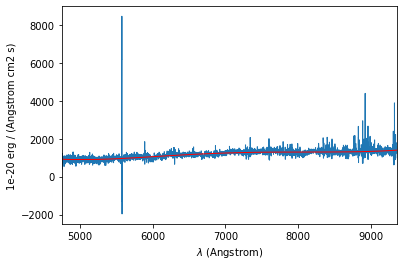

In [71]:
spee = small.sum(axis=(1,2))
spee.info()
spee.plot()
spee.poly_spec(5).plot(color='r')

WCS Keywords

Number of WCS axes: 1
CTYPE : 'AWAV'  
CRVAL : 4750.41015625  
CRPIX : 1.0  
PC1_1  : 1.0  
CDELT : 1.25  
NAXIS : 0  0

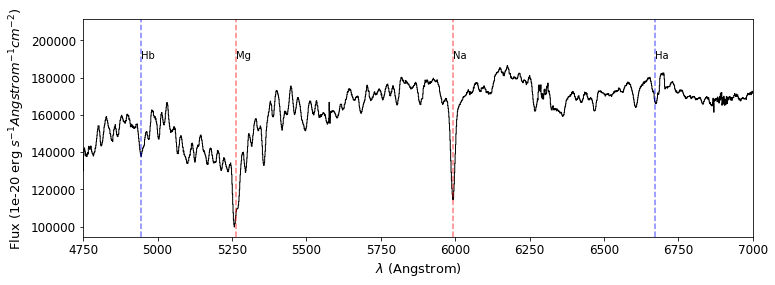

In [4]:
# center of elliptical galaxy
small2 = cube[:,229:239,229:239]
speec = small2.sum(axis=(1,2))
plt.figure(figsize=(12,4))
speec.plot(color='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('Flux (1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$)',fontsize=13)
plt.axvline(5176+(5176*0.0168),color='r',alpha=0.5,linestyle='dashed')
plt.text(x=5176+(5176*0.0168),y=190000,s='Mg')
plt.axvline(5895+(5895*0.0168),color='r',alpha=0.5,linestyle='dashed')
plt.text(x=5895+(5895*0.0168),y=190000,s='Na')
plt.axvline(6562+(6562*0.0168),color='b',alpha=0.5,linestyle='dashed')
plt.text(x=6562+(6562*0.0168),y=190000,s='Ha')
plt.axvline(4861+(4861*0.0168),color='b',alpha=0.5,linestyle='dashed')
plt.text(x=4861+(4861*0.0168),y=190000,s='Hb')
#plt.axvline(5176,color='r',alpha=0.5,linestyle='solid')
#plt.text(x=5176,y=190000,s='Mg')
#plt.axvline(5895,color='r',alpha=0.5,linestyle='solid')
#plt.text(x=5895,y=190000,s='Na')


#speec.poly_spec(8).plot(color='r') # use for continuum
plt.xlim(4750,7000)
small2.wave

(150000, 200000)

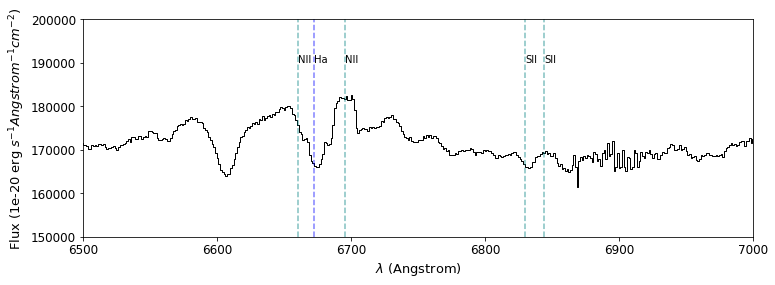

In [5]:
plt.figure(figsize=(12,4))
speec.plot(color='k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('Flux (1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$)',fontsize=13)
plt.axvline(6550+(6550*0.0168),color='teal',alpha=0.5,linestyle='dashed')
plt.text(x=6550+(6550*0.0168),y=190000,s='NII')
plt.axvline(6585+(6585*0.0168),color='teal',alpha=0.5,linestyle='dashed')
plt.text(x=6585+(6585*0.0168),y=190000,s='NII')
plt.axvline(6717+(6717*0.0168),color='teal',alpha=0.5,linestyle='dashed')
plt.text(x=6717+(6717*0.0168),y=190000,s='SII')
plt.axvline(6731+(6731*0.0168),color='teal',alpha=0.5,linestyle='dashed')
plt.text(x=6731+(6731*0.0168),y=190000,s='SII')
plt.axvline(6562+(6562*0.0168),color='b',alpha=0.5,linestyle='dashed')
plt.text(x=6562+(6562*0.0168),y=190000,s='Ha')

#speec.poly_spec(8).plot(color='r') # use for continuum
plt.xlim(6500,7000)
plt.ylim(150000,200000)

In [23]:
Spectrum.write(speec,'speec.fits')

In [47]:
speecline = Spectrum('speec.fits')

In [18]:
hdul = fits.open('spe23.fits')
hdul.info()
print(hdul[1].header)
data = hdul[1].data

Filename: spe23.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  DATA          1 ImageHDU        14   (3682,)   float32   
  2  STAT          1 ImageHDU        14   (3682,)   float32   
  3  DQ            1 ImageHDU        13   (3682,)   uint8   
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -32 / array data type                                NAXIS   =                    1 / number of array dimensions                     NAXIS1  =                 3682                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               WCSAXES =                    1 / Number of coordinate axes                      CRVAL1  =        4750.41015625 / Coordinate value at reference point            CRPIX1  =                  1.0 / Pixel 

In [19]:
wp = {"CRVAL1":4750.41015625, "CDELT1":1.25, "CRPIX1":1.0}
pyasl.write1dFitsSpec('n23-1dspec.fits',data,waveParams=wp,clobber=True)

### For each of the 15 source candidates (determined by ds9 and sextractor), extract 400 spectra from 20x20 pixel sub-cubes, sum, then plot:

### NOTE!!! cube axes are entered in as: [wavelength, y-value, x-value]

In [5]:
#n0 = cube[:,250:300,105:125] #77,71,55 #aperture = 50x20 
n1 = cube[:,328:342,251:271] #51 #aperture = 14x20
n2 = cube[:,318:329,245:265] #85 #aperture = 11x20
#n3 = cube[:,178:198,156:176] #100 #aperture = 20x20
n4 = cube[:,172:187,163:178] #105 #aperture = 15x15
#n5 = cube[:,123:143,227:247] #117 #aperture = 20x20
n6 = cube[:,253:273,138:158] #75 #aperture = 20x20
n7 = cube[:,138:158,177:197] #128 #aperture = 20x20
n8 = cube[:,173:193,316:336] #103 #aperture = 20x20
#n9 = cube[:,123:153,300:330] #112 #aperture = 30x30
n10 = cube[:,138:153,195:208] #115 #aperture = 15x13
#n11 = cube[:,118:138,198:238] #119 #aperture = 20x40
n12 = cube[:,107:127,253:273] #127 #aperture = 20x20
n13 = cube[:,97:117,202:222] #130 #aperture = 20x20
n14 = cube[:,180:200,140:160] #139 #aperture = 20x20
n15 = cube[:,160:176,149:165] #aperture = 16x16
n16 = cube[:,143:163,285:305] #aperture = 20x20
n17 = cube[:,222:242,313:333] #aperture = 20x20
n18 = cube[:,238:258,339:359] #aperture = 20x20
n19 = cube[:,305:325,169:189] #aperture = 20x20
n20 = cube[:,198:218,301:321] #aperture = 20x20
n21 = cube[:,236:256,387:407] #aperture = 20x10
n22 = cube[:,127:147,269:289] #aperture = 20x20
n23 = cube[:,274:289,290:305] #aperture = 15x15

In [21]:
#spe0 = n0.sum(axis=(1,2))
spe1 = n1.sum(axis=(1,2))
spe2 = n2.sum(axis=(1,2))
#spe3 = n3.sum(axis=(1,2))
spe4 = n4.sum(axis=(1,2))
#spe5 = n5.sum(axis=(1,2))
spe6 = n6.sum(axis=(1,2))
spe7 = n7.sum(axis=(1,2))
spe8 = n8.sum(axis=(1,2))
#spe9 = n9.sum(axis=(1,2))
spe10 = n10.sum(axis=(1,2))
#spe11 = n11.sum(axis=(1,2))
spe12 = n12.sum(axis=(1,2))
spe13 = n13.sum(axis=(1,2))
spe14 = n14.sum(axis=(1,2))
spe15 = n15.sum(axis=(1,2))
spe16 = n16.sum(axis=(1,2))
spe17 = n17.sum(axis=(1,2))
spe18 = n18.sum(axis=(1,2))
spe19 = n19.sum(axis=(1,2))
spe20 = n20.sum(axis=(1,2))
spe21 = n21.sum(axis=(1,2))
spe22 = n22.sum(axis=(1,2))
spe23 = n23.sum(axis=(1,2))

### The following is to mask instances of strong sky emission lines in the spectra:

In [22]:
lmin=5572
lmax=5580
#spe0.mask_region(lmin, lmax, unit=u.angstrom)
spe1.mask_region(lmin, lmax, unit=u.angstrom)
spe2.mask_region(lmin, lmax, unit=u.angstrom)
#spe3.mask_region(lmin, lmax, unit=u.angstrom)
spe4.mask_region(lmin, lmax, unit=u.angstrom)
#spe5.mask_region(lmin, lmax, unit=u.angstrom)
spe6.mask_region(lmin, lmax, unit=u.angstrom)
spe7.mask_region(lmin, lmax, unit=u.angstrom)
spe8.mask_region(lmin, lmax, unit=u.angstrom)
#spe9.mask_region(lmin, lmax, unit=u.angstrom)
spe10.mask_region(lmin, lmax, unit=u.angstrom)
#spe11.mask_region(lmin, lmax, unit=u.angstrom)
spe12.mask_region(lmin, lmax, unit=u.angstrom)
spe13.mask_region(lmin, lmax, unit=u.angstrom)
spe14.mask_region(lmin, lmax, unit=u.angstrom)
spe15.mask_region(lmin, lmax, unit=u.angstrom)
spe16.mask_region(lmin, lmax, unit=u.angstrom)
spe17.mask_region(lmin, lmax, unit=u.angstrom)
spe18.mask_region(lmin, lmax, unit=u.angstrom)
spe19.mask_region(lmin, lmax, unit=u.angstrom)
spe20.mask_region(lmin, lmax, unit=u.angstrom)
spe21.mask_region(lmin, lmax, unit=u.angstrom)
spe22.mask_region(lmin, lmax, unit=u.angstrom)
spe23.mask_region(lmin, lmax, unit=u.angstrom)

In [23]:
lmin=5890
lmax=5903
#spe0.mask_region(lmin, lmax, unit=u.angstrom)
spe1.mask_region(lmin, lmax, unit=u.angstrom)
spe2.mask_region(lmin, lmax, unit=u.angstrom)
#spe3.mask_region(lmin, lmax, unit=u.angstrom)
spe4.mask_region(lmin, lmax, unit=u.angstrom)
#spe5.mask_region(lmin, lmax, unit=u.angstrom)
spe6.mask_region(lmin, lmax, unit=u.angstrom)
spe7.mask_region(lmin, lmax, unit=u.angstrom)
spe8.mask_region(lmin, lmax, unit=u.angstrom)
#spe9.mask_region(lmin, lmax, unit=u.angstrom)
spe10.mask_region(lmin, lmax, unit=u.angstrom)
#spe11.mask_region(lmin, lmax, unit=u.angstrom)
spe12.mask_region(lmin, lmax, unit=u.angstrom)
spe13.mask_region(lmin, lmax, unit=u.angstrom)
spe14.mask_region(lmin, lmax, unit=u.angstrom)
spe15.mask_region(lmin, lmax, unit=u.angstrom)
spe16.mask_region(lmin, lmax, unit=u.angstrom)
spe17.mask_region(lmin, lmax, unit=u.angstrom)
spe18.mask_region(lmin, lmax, unit=u.angstrom)
spe19.mask_region(lmin, lmax, unit=u.angstrom)
spe20.mask_region(lmin, lmax, unit=u.angstrom)
spe21.mask_region(lmin, lmax, unit=u.angstrom)
spe22.mask_region(lmin, lmax, unit=u.angstrom)
spe23.mask_region(lmin, lmax, unit=u.angstrom)

In [24]:
lmin=6297
lmax=6303
#spe0.mask_region(lmin, lmax, unit=u.angstrom)
spe1.mask_region(lmin, lmax, unit=u.angstrom)
spe2.mask_region(lmin, lmax, unit=u.angstrom)
#spe3.mask_region(lmin, lmax, unit=u.angstrom)
spe4.mask_region(lmin, lmax, unit=u.angstrom)
#spe5.mask_region(lmin, lmax, unit=u.angstrom)
spe6.mask_region(lmin, lmax, unit=u.angstrom)
spe7.mask_region(lmin, lmax, unit=u.angstrom)
spe8.mask_region(lmin, lmax, unit=u.angstrom)
#spe9.mask_region(lmin, lmax, unit=u.angstrom)
spe10.mask_region(lmin, lmax, unit=u.angstrom)
#spe11.mask_region(lmin, lmax, unit=u.angstrom)
spe12.mask_region(lmin, lmax, unit=u.angstrom)
spe13.mask_region(lmin, lmax, unit=u.angstrom)
spe14.mask_region(lmin, lmax, unit=u.angstrom)
spe15.mask_region(lmin, lmax, unit=u.angstrom)
spe16.mask_region(lmin, lmax, unit=u.angstrom)
spe17.mask_region(lmin, lmax, unit=u.angstrom)
spe18.mask_region(lmin, lmax, unit=u.angstrom)
spe19.mask_region(lmin, lmax, unit=u.angstrom)
spe20.mask_region(lmin, lmax, unit=u.angstrom)
spe21.mask_region(lmin, lmax, unit=u.angstrom)
spe22.mask_region(lmin, lmax, unit=u.angstrom)
spe23.mask_region(lmin, lmax, unit=u.angstrom)

In [323]:
#spvarcut0 = spe0.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
#spvarcut0.interp_mask()
#plt.figure(figsize=(10,4))
#spvarcut0.plot(lmin=4750, lmax=7000, title='Spectrum after interpolation', unit=u.angstrom)
#plt.xlim(4750,7000)
#plt.figure(figsize=(12,4))
#sprebin0 = spvarcut0.rebin(5)
#spvarcut0.plot()
#(sprebin0 + 10).plot(noise=True)

### Save the spectrum as a .fits file:

In [25]:
#Spectrum.write(spe0,'spe0.fits')
#Spectrum.write(spe1,'spe1.fits')
#Spectrum.write(spe2,'spe2.fits')
#Spectrum.write(spe3,'spe3.fits')
Spectrum.write(spe4,'spe4.fits')
#Spectrum.write(spe5,'spe5.fits')
Spectrum.write(spe6,'spe6.fits')
Spectrum.write(spe7,'spe7.fits')
Spectrum.write(spe8,'spe8.fits')
#Spectrum.write(spe9,'spe9.fits')
#Spectrum.write(spe10,'spe10.fits')
#Spectrum.write(spe11,'spe11.fits')
Spectrum.write(spe12,'spe12.fits')
Spectrum.write(spe13,'spe13.fits')
#Spectrum.write(spe14,'spe14.fits')
#Spectrum.write(spe15,'spe15.fits')
Spectrum.write(spe16,'spe16.fits')
Spectrum.write(spe17,'spe17.fits')
Spectrum.write(spe18,'spe18.fits')
Spectrum.write(spe19,'spe19.fits')
Spectrum.write(spe20,'spe20.fits')
Spectrum.write(spe21,'spe21.fits')
Spectrum.write(spe22,'spe22.fits')
Spectrum.write(spe23,'spe23.fits')

In [44]:
hdul = fits.open('spe23.fits')
hdul.info()
print(hdul[1].header)
data = hdul[1].data

Filename: spe23.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  DATA          1 ImageHDU        14   (3682,)   float32   
  2  STAT          1 ImageHDU        14   (3682,)   float32   
  3  DQ            1 ImageHDU        13   (3682,)   uint8   
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                  -32 / array data type                                NAXIS   =                    1 / number of array dimensions                     NAXIS1  =                 3682                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups                               WCSAXES =                    1 / Number of coordinate axes                      CRVAL1  =        4750.41015625 / Coordinate value at reference point            CRPIX1  =                  1.0 / Pixel 

In [45]:
wp = {"CRVAL1":4750.41015625, "CDELT1":1.25, "CRPIX1":1.0}

In [46]:
pyasl.write1dFitsSpec('n23-1dspec.fits',data,waveParams=wp,clobber=True)

### Load the saved spectrum as a Spectrum object:

In [88]:
#specline0 = Spectrum('spe0.fits')
specline1 = Spectrum('spe1.fits')
specline2 = Spectrum('spe2.fits')
#specline3 = Spectrum('spe3.fits')
specline4 = Spectrum('spe4.fits')
#specline5 = Spectrum('spe5.fits')
specline6 = Spectrum('spe6.fits')
specline7 = Spectrum('spe7.fits')
specline8 = Spectrum('spe8.fits')
#specline9 = Spectrum('spe9.fits')
specline10 = Spectrum('spe10.fits')
#specline11 = Spectrum('spe11.fits')
specline12 = Spectrum('spe12.fits')
specline13 = Spectrum('spe13.fits')
specline14 = Spectrum('spe14.fits')
specline15 = Spectrum('spe15.fits')
specline16 = Spectrum('spe16.fits')
specline17 = Spectrum('spe17.fits')
specline18 = Spectrum('spe18.fits')
specline19 = Spectrum('spe19.fits')
specline20 = Spectrum('spe20.fits')
specline21 = Spectrum('spe21.fits')

### Now to plot each spectrum. Absorption features (x1,x2,x3,x4) are indicated by a vertical dashed line. The dashed lines have been corrected for redshift (assuming redshift value of z=0.0168).

In [11]:
z=0.0168
x1=5263 # Mg
x2=5895 # Na
x3=6562 # H-alpha
x4=4861 # H-beta
SIIa=6717
SIIb=6731 
NIIa=6550
NIIb=6585

plt.figure(figsize=(12,4))
spe0.plot(title='77,71,55',color='k')
plt.xlim(4750,7000)
plt.ylim(1400,4700)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('Flux (1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$)',fontsize=13)

y=4400
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

#from astropy import units as Unit
#sm_spec = spe0.fftconvolve_gauss( center=None, flux=1.0, fwhm=(1.0, 1.0), peak=False, rot=0.0, factor=1, unit_center=Unit('deg'), unit_fwhm=Unit('arcsec'), inplace=False)
#plt.plot(sm_spec)

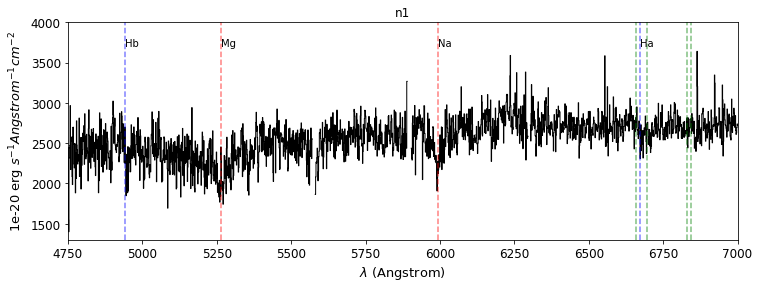

In [38]:
plt.figure(figsize=(12,4))
spe1.plot(title='n1',color='k')
plt.xlim(4750,7000)
plt.ylim(1300,4000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=3700
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')
plt.axvline(SIIa+(SIIa*z),color='g',alpha=0.5,linestyle='dashed')
#plt.text(SIIa+(SIIa*z),y,s='SII')
plt.axvline(SIIb+(SIIb*z),color='g',alpha=0.5,linestyle='dashed')
#plt.text(SIIb+(SIIb*z),y+200,s='SII')
plt.axvline(NIIa+(NIIa*z),color='g',alpha=0.5,linestyle='dashed')
#plt.text(NIIa+(NIIa*z),y-200,s='NII')
plt.axvline(NIIb+(NIIb*z),color='g',alpha=0.5,linestyle='dashed')
#plt.text(NIIb+(NIIb*z),y+200,s='NII')

Text(4942.6648, 3700, 'Hb')

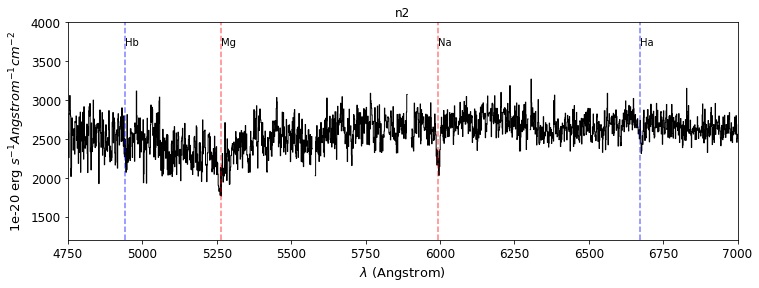

In [39]:
plt.figure(figsize=(12,4))
spe2.plot(title='n2',color='k')
plt.xlim(4750,7000)
plt.ylim(1200,4000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=3700
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

plt.figure(figsize=(12,4))
spe3.plot(title='100',color='k')
plt.xlim(4750,7000)
plt.ylim(2200,5000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=4600
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

Text(4942.6648, 2500, 'Hb')

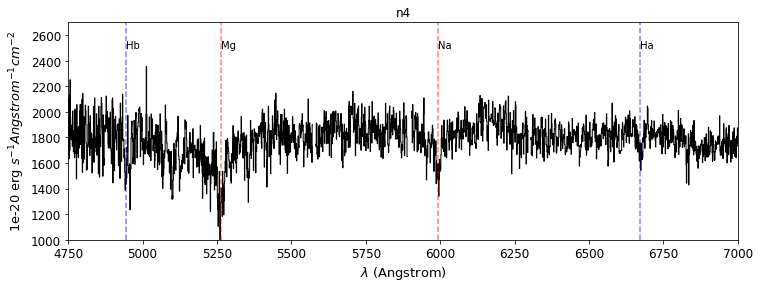

In [40]:
plt.figure(figsize=(12,4))
spe4.plot(title='n4',color='k')
plt.xlim(4750,7000)
plt.ylim(1000,2700)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=2500
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

plt.figure(figsize=(12,4))
spe5.plot(title='117',color='k')
plt.xlim(4750,7000)
plt.ylim(2000,5500)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=5200
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

Text(4942.6648, 4400, 'Hb')

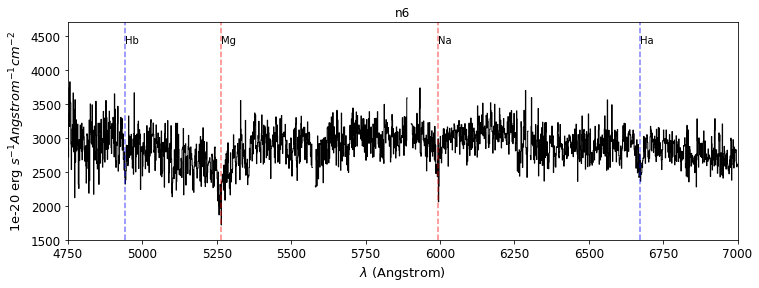

In [41]:
plt.figure(figsize=(12,4))
spe6.plot(title='n6',color='k')
plt.xlim(4750,7000)
plt.ylim(1500,4700)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=4400
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

Text(4942.6648, 2250, 'Hb')

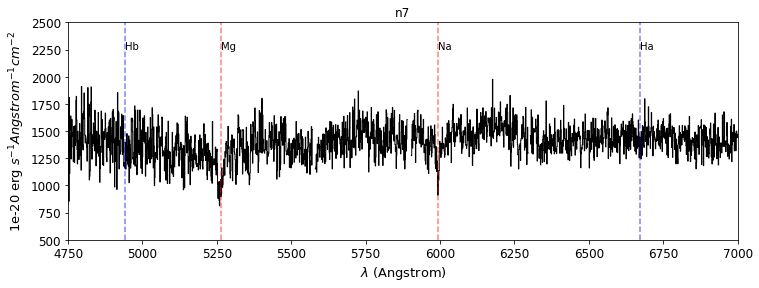

In [42]:
plt.figure(figsize=(12,4))
spe7.plot(title='n7',color='k')
plt.xlim(4750,7000)
plt.ylim(500,2500)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=2250
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

Text(4942.6648, 3100, 'Hb')

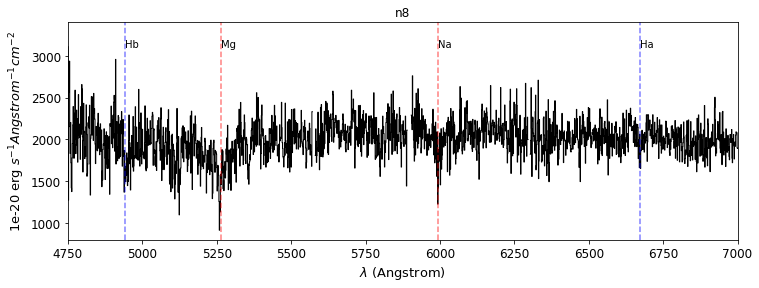

In [43]:
plt.figure(figsize=(12,4))
spe8.plot(title='n8',color='k')
plt.xlim(4750,7000)
plt.ylim(800,3400)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=3100
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

plt.figure(figsize=(12,4))
spe9.plot(title='112',color='k')
plt.xlim(4750,7000)
plt.ylim(1100,6000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=5500
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

Text(4942.6648, 2700, 'Hb')

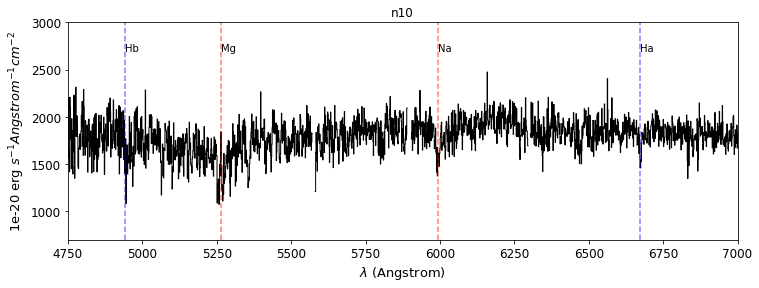

In [44]:
plt.figure(figsize=(12,4))
spe10.plot(title='n10',color='k')
plt.xlim(4750,7000)
plt.ylim(700,3000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=2700
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

plt.figure(figsize=(12,4))
spe11.plot(title='119',color='k')
plt.xlim(4750,7000)
plt.ylim(3300,8700)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=8000
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

Text(4942.6648, 3000, 'Hb')

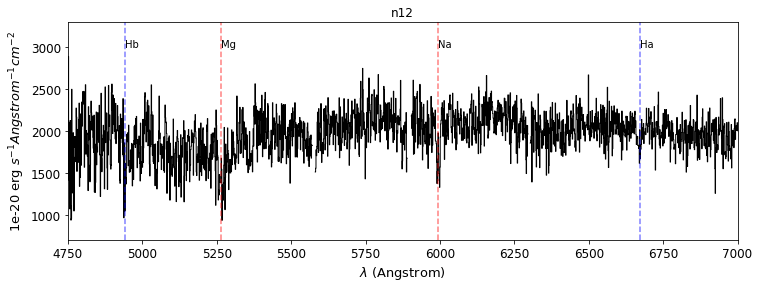

In [45]:
plt.figure(figsize=(12,4))
spe12.plot(title='n12',color='k')
plt.xlim(4750,7000)
plt.ylim(700,3300)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=3000
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

Text(4942.6648, 2800, 'Hb')

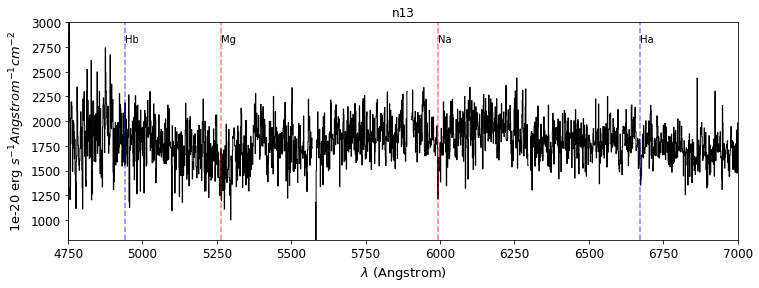

In [46]:
plt.figure(figsize=(12,4))
spe13.plot(title='n13',color='k')
plt.xlim(4750,7000)
plt.ylim(800,3000)
#plt.xlim(4750,7000)
#plt.ylim(0,50)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=2800
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

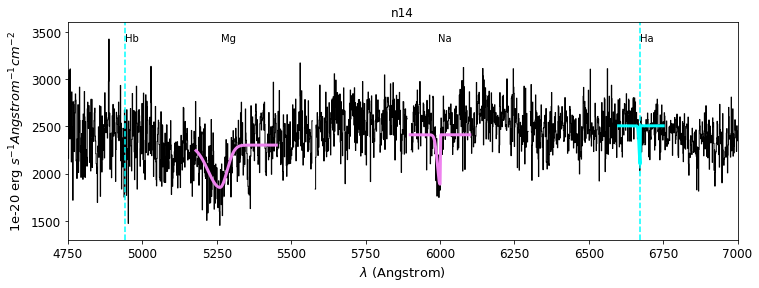

In [47]:
plt.figure(figsize=(12,4))
spe14.plot(title='n14',color='k')
plt.xlim(4750,7000)
plt.ylim(1300,3600)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=3400
#plt.axvline(x1,color='violet',linestyle='dashed')
plt.text(x1,y,s='Mg')
#plt.axvline(x2+(x2*z),color='violet',linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='aqua',linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='aqua',linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')
specline14.gauss_asymfit(lmin=5180, lmax=5450,lpeak=5252, unit=u.angstrom, plot=True)
plt.gca().get_lines()[3].set_color("violet")
plt.gca().get_lines()[3].set_linestyle("solid")
plt.gca().get_lines()[3].set_linewidth(3)
specline14.gauss_asymfit(lmin=5900, lmax=6100,lpeak=5999, unit=u.angstrom, plot=True)
plt.gca().get_lines()[4].set_color("violet")
plt.gca().get_lines()[4].set_linestyle("solid")
plt.gca().get_lines()[4].set_linewidth(3)
specline14.gauss_asymfit(lmin=6600, lmax=6750,lpeak=6672, unit=u.angstrom, plot=True)
plt.gca().get_lines()[5].set_color("aqua")
plt.gca().get_lines()[5].set_linestyle("solid")
plt.gca().get_lines()[5].set_linewidth(3)

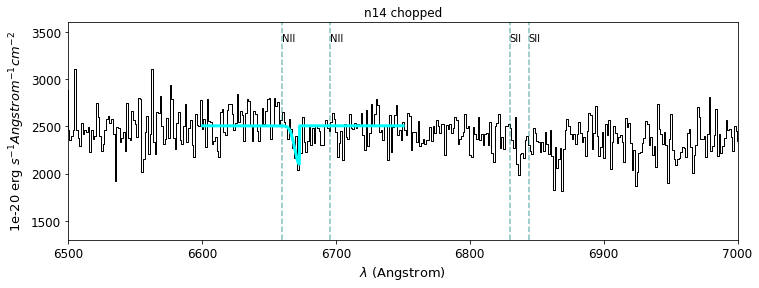

In [48]:
plt.figure(figsize=(12,4))
spe14.plot(title='n14 chopped',color='k')
plt.xlim(6500,7000)
plt.ylim(1300,3600)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=3400
plt.axvline(6550+(6550*0.0168),color='teal',alpha=0.5,linestyle='dashed')
plt.text(x=6550+(6550*0.0168),y=3400,s='NII')
plt.axvline(6585+(6585*0.0168),color='teal',alpha=0.5,linestyle='dashed')
plt.text(x=6585+(6585*0.0168),y=3400,s='NII')
plt.axvline(6717+(6717*0.0168),color='teal',alpha=0.5,linestyle='dashed')
plt.text(x=6717+(6717*0.0168),y=3400,s='SII')
plt.axvline(6731+(6731*0.0168),color='teal',alpha=0.5,linestyle='dashed')
plt.text(x=6731+(6731*0.0168),y=3400,s='SII')
#plt.axvline(x4+(x4*z),color='aqua',linestyle='dashed')
#plt.text(x4+(x4*z),y=3400,s='Hb')
specline14.gauss_asymfit(lmin=6600, lmax=6750,lpeak=6672, unit=u.angstrom, plot=True)
plt.gca().get_lines()[5].set_color("aqua")
plt.gca().get_lines()[5].set_linestyle("solid")
plt.gca().get_lines()[5].set_linewidth(3)

Text(4942.6648, 2500, 'Hb')

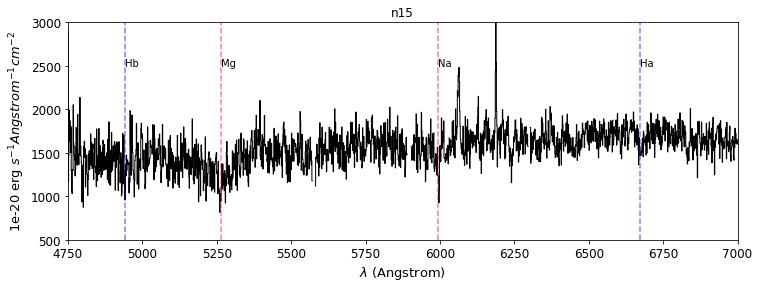

In [51]:
plt.figure(figsize=(12,4))
spe15.plot(title='n15',color='k')
plt.xlim(4750,7000)
plt.ylim(500,3000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=2500
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

Text(4942.6648, 3900, 'Hb')

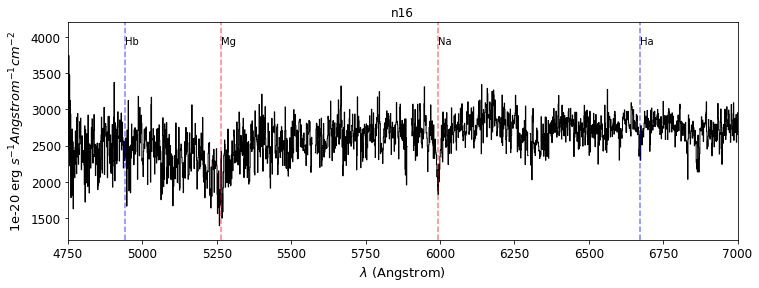

In [55]:
plt.figure(figsize=(12,4))
spe16.plot(title='n16',color='k')
plt.xlim(4750,7000)
plt.ylim(1200,4200)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=3900
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

Text(4942.6648, 3700, 'Hb')

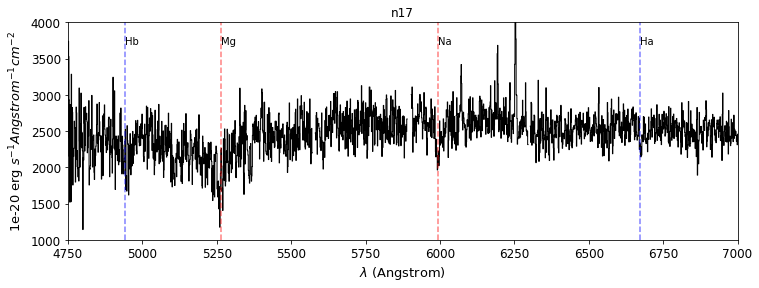

In [61]:
plt.figure(figsize=(12,4))
spe17.plot(title='n17',color='k')
plt.xlim(4750,7000)
plt.ylim(1000,4000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=3700
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

Text(4942.6648, 2400, 'Hb')

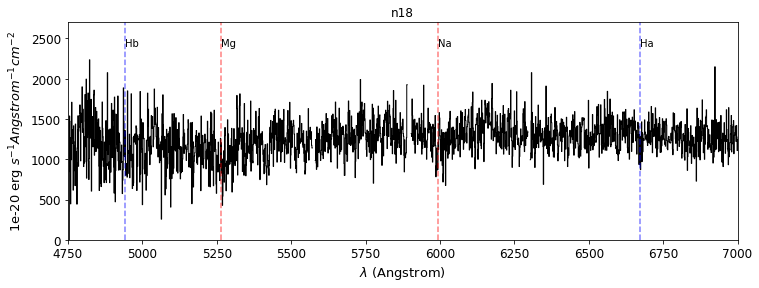

In [65]:
plt.figure(figsize=(12,4))
spe18.plot(title='n18',color='k')
plt.xlim(4750,7000)
plt.ylim(0,2700)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=2400
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

Text(4942.6648, 4300, 'Hb')

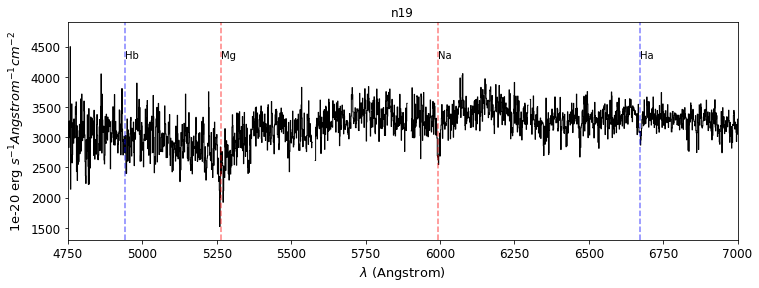

In [72]:
plt.figure(figsize=(12,4))
spe19.plot(title='n19',color='k')
plt.xlim(4750,7000)
plt.ylim(1300,4900)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=4300
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

Text(4942.6648, 4500, 'Hb')

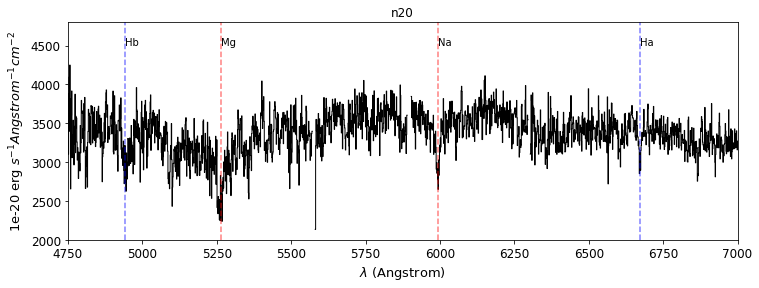

In [76]:
plt.figure(figsize=(12,4))
spe20.plot(title='n20',color='k')
plt.xlim(4750,7000)
plt.ylim(2000,4800)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=4500
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

Text(4942.6648, 4700, 'Hb')

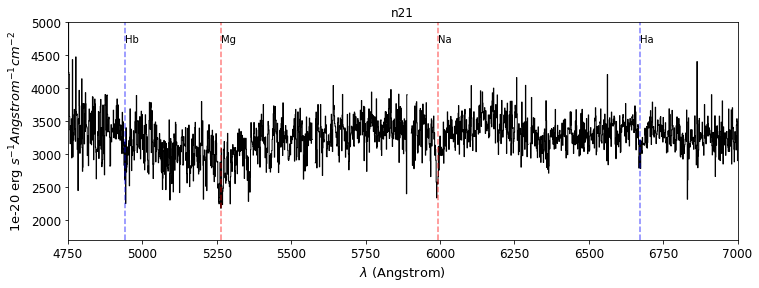

In [91]:
plt.figure(figsize=(12,4))
spe21.plot(title='n21',color='k')
plt.xlim(4750,7000)
plt.ylim(1700,5000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(r'$\lambda$ (Angstrom)',fontsize=13)
plt.ylabel('1e-20 erg $ s^{-1} Angstrom^{-1} cm^{-2}$',fontsize=13)

y=4700
plt.axvline(x1,color='r',alpha=0.5,linestyle='dashed')
plt.text(x1,y,s='Mg')
plt.axvline(x2+(x2*z),color='r',alpha=0.5,linestyle='dashed')
plt.text(x2+(x2*z),y,s='Na')
plt.axvline(x3+(x3*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x3+(x3*z),y,s='Ha')
plt.axvline(x4+(x4*z),color='b',alpha=0.5,linestyle='dashed')
plt.text(x4+(x4*z),y,s='Hb')

In [263]:
f0=spe0.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
f1=spe1.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
f2=spe2.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
f3=spe3.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
f4=spe4.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
f5=spe5.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
f6=spe6.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
f7=spe7.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
f8=spe8.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
f9=spe9.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
f10=spe10.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
f11=spe11.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
f12=spe12.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
f13=spe13.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
f14=spe14.subspec(lmin=4750, lmax=7000, unit=u.angstrom)
me=spe2.mean(lmin=4750, lmax=7000, unit=u.angstrom)
print(me)

(4692.064360085098, 2.9209555751404994)


In [259]:
snr=spe0.data/np.sqrt(spe0.var)
print(snr)
print(snr.sum()/len(snr))
std=np.sqrt(spe0.var)
me[0]/std

[1.5013412274462765 2.0392577574521464 4.9021325516267895 ...
 8.933723118166812 3.185454934918655 --]
15.531040886006618


/Users/alicejacques/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


masked_array(data=[4.245148917707907, 5.763545437909435,
                   6.054071176956009, ..., 8.333398285887304,
                   6.29768827682547, --],
             mask=[False, False, False, ..., False, False,  True],
       fill_value=1e+20)

In [ ]:
4.086612811258466
5.444705767352552
6.369084064556987
6.456746712663429
5.240230879337282
3.0677764635565374
3.804628832454308
3.339883447439696
1.7905273094763996
4.21636024691575
3.979926283041092
3.089079797296033
3.060408508381238
3.127175069077283